# **Procesamiento de audio**

### Ciencia de Datos para Sensores Inteligentes/Tópicos Selectos en Sistemas Interactivos

*Estudiante: Cielo Aholiva Higuera Gutiérrez*

Este notebook tiene como objetivo explorar diversas librerías de Python para el procesamiento de audio, aplicando más de cinco herramientas para su tratamiento.

Los datos utilizados se obtuvieron del siguiente enlace de Kaggle: https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs/data?select=cats_dogs

*Importar librerias*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install pydub --quiet
!apt-get install ffmpeg --quiet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [27]:
# Librerias para audio
from pydub import AudioSegment
import IPython.display as ipd
from IPython.display import Audio, display, Markdown
from pydub import AudioSegment
from scipy.signal import butter, lfilter
import librosa
import wave
import soundfile as sf
import librosa.display
# Data
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
## path to the directory

base_path = "/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train"
cat_path = os.path.join(base_path, "cat")
dog_path = os.path.join(base_path, "dog")

Número de audios de gatos: 125
Número de audios de perros: 85


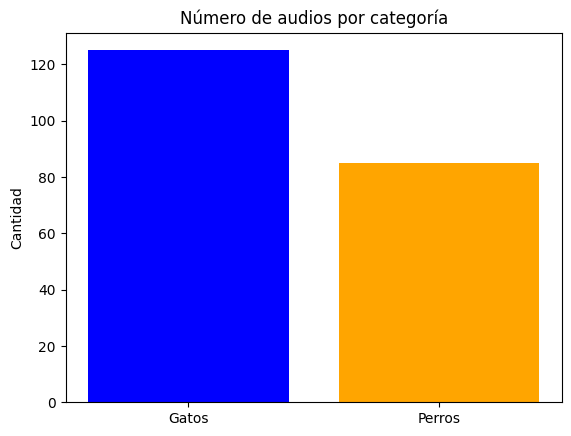

In [4]:
num_cats = len([f for f in os.listdir(cat_path) if os.path.isfile(os.path.join(cat_path, f))])
num_dogs = len([f for f in os.listdir(dog_path) if os.path.isfile(os.path.join(dog_path, f))])

print(f"Número de audios de gatos: {num_cats}")
print(f"Número de audios de perros: {num_dogs}")

# Gráfico de barras
labels = ['Gatos', 'Perros']
counts = [num_cats, num_dogs]

plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Número de audios por categoría')
plt.ylabel('Cantidad')
plt.show()

In [5]:
### Cargar audio y la frecuencia de la muestra

cat, sr = librosa.load('/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train/cat/cat_100.wav') ## cat es una matriz (array) que contiene los valores de la señal de audio. sr es la frecuencia de muestro
print(f"Frecuencia de la muestra: {sr} Hz")
print(f"Duración del audio de la categoría de gato: {librosa.get_duration(y=cat, sr=sr)} segundos")

dog, sr = librosa.load('/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train/dog/dog_barking_101.wav') ## Dog es una matriz (array) que contiene los valores de la señal de audio. sr es la frecuencia de muestro
print(f"Frecuencia de la muestra: {sr} Hz")
print(f"Duración del audio de la categoría de perro: {librosa.get_duration(y=dog, sr=sr)} segundos")

Frecuencia de la muestra: 22050 Hz
Duración del audio de la categoría de gato: 1.293514739229025 segundos
Frecuencia de la muestra: 22050 Hz
Duración del audio de la categoría de perro: 2.99546485260771 segundos


In [6]:
with wave.open('/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train/cat/cat_100.wav', 'r') as f:
    print(f.getnchannels())  # Número de canales
    print(f.getframerate())  # Frecuencia de muestreo
    print(f.getnframes())  # Número de frames

1
16000
20696


In [7]:
with wave.open('/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train/dog/dog_barking_101.wav', 'r') as f:
    print(f.getnchannels())  # Número de canales
    print(f.getframerate())  # Frecuencia de muestreo
    print(f.getnframes())  # Número de frames

1
16000
47927


In [28]:
data, samplerate = sf.read('/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train/dog/dog_barking_101.wav')
print(f"Shape: {data.shape}, Sample Rate: {samplerate}")

Shape: (47927,), Sample Rate: 16000


El archivo tiene 47,927 frames, y una frecuencia de muestreo de 16,000 Hz.

Reproducción del audio

In [8]:
Audio(cat, rate=sr) # Reproducir el audio cargado, se utiliza la variable audio para la reproducción y sr, para la frecuencia de muestreo

In [9]:
Audio(dog, rate=sr )

**Forma de onda del audio**

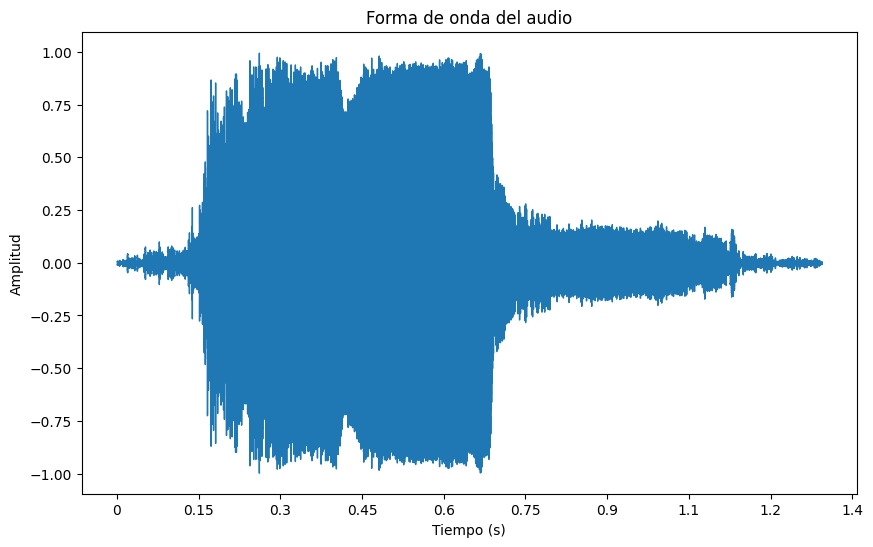

In [10]:
# Forma de onda de audio del audio del gato
plt.figure(figsize=(10, 6))
librosa.display.waveshow(cat, sr=sr)
plt.title('Forma de onda del audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

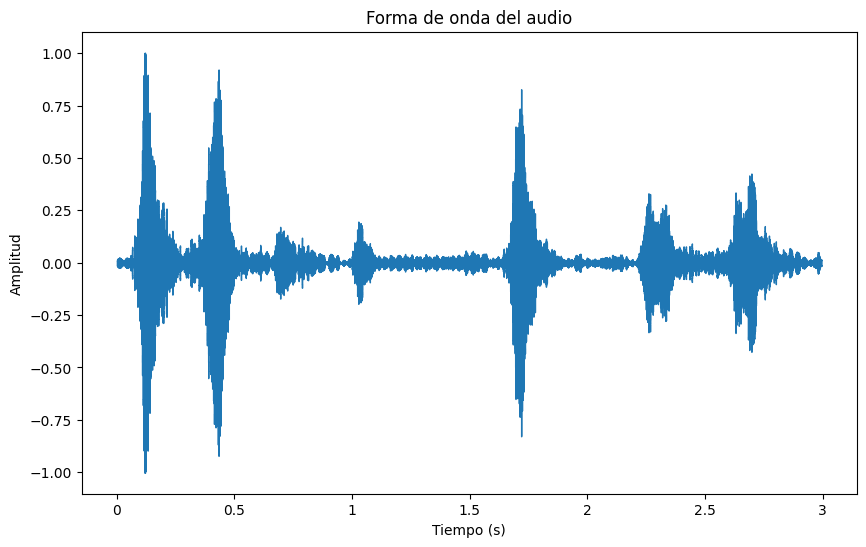

In [11]:
# Forma de onda de audio del audio del perro
plt.figure(figsize=(10, 6))
librosa.display.waveshow(dog, sr=sr)
plt.title('Forma de onda del audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

**Transformación a espectograma (Transformada de Fourier)**

<ipython-input-12-d886bc5e5894>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  espectograma = librosa.amplitude_to_db(librosa.stft(cat), ref=np.max)


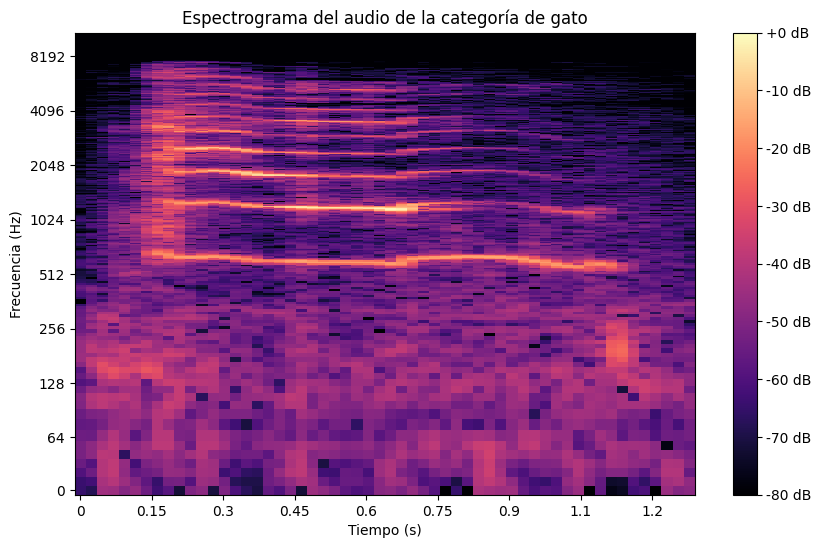

In [12]:
## Espectograma del audio del gato

espectograma = librosa.amplitude_to_db(librosa.stft(cat), ref=np.max)
## Convertir el audio en un espectograma para ver como varia la frecuiencia con el tiempo es muy útil para analizar la composición en la frecuencia del audio
plt.figure(figsize=(10, 6))
librosa.display.specshow(espectograma, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio de la categoría de gato')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

<ipython-input-13-9eb1b171c411>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  espectograma = librosa.amplitude_to_db(librosa.stft(dog), ref=np.max)


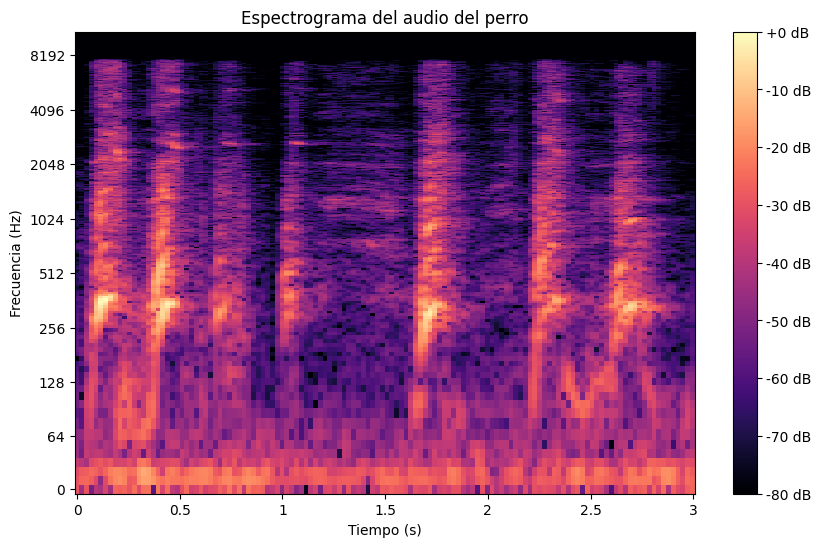

In [13]:
## Espectograma del audio del perro

espectograma = librosa.amplitude_to_db(librosa.stft(dog), ref=np.max)
## Convertir el audio en un espectograma para ver como varia la frecuiencia con el tiempo es muy útil para analizar la composición en la frecuencia del audio
plt.figure(figsize=(10, 6))
librosa.display.specshow(espectograma, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma del audio del perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.show()

Los colores del espectrograma representan la intensidad del sonido (o amplitud) en cada combinación de tiempo y frecuencia, y están codificados en decibelios (dB).

 - **Colores brillantes (amarillos y naranjas)**: Representan frecuencias con **mayor intensidad** o energía. Estas son las partes más audibles o predominantes en el audio. Lo que representa o que indica un contenido sonoro más fuerte en las frecuencias graves.
 - **Colores oscuros (morado o negro)**: Representan frecuencias con **menor intensidad**, es decir, partes más silenciosas o ausentes en el sonido. Lo que sugiere que las frecuencias agudas tienen menor energía o no son prominentes en el audio.

**Corte o segmentación del audio**

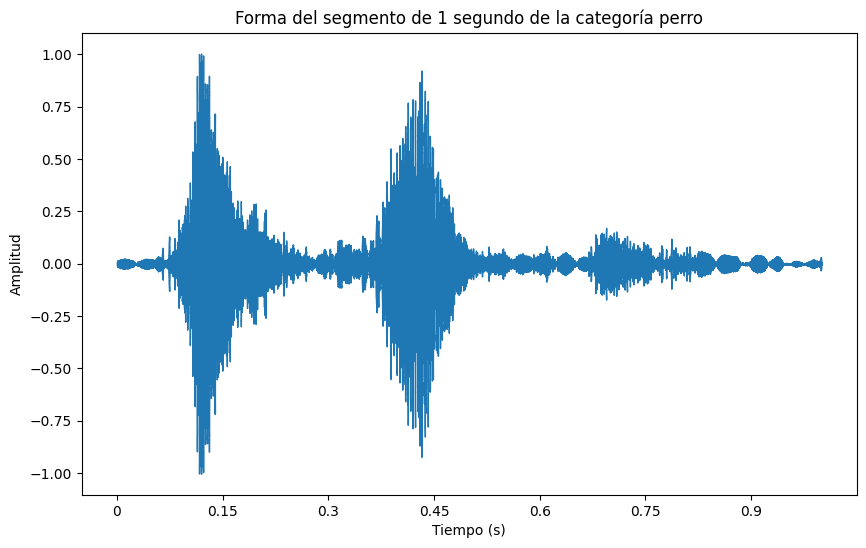

Audio de 1 segundos


In [14]:
# Corte del audio entre los primeros diez segundos

start = librosa.time_to_samples(0)
end = librosa.time_to_samples(1)
audio_1s = dog[start:end]

# Visualización de la forma del segmento
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_1s, sr=sr)
plt.title('Forma del segmento de 1 segundo de la categoría perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()
# Reproduccion del audio
print("Audio de 1 segundos")
Audio(audio_1s, rate=sr)

**Extracción de características: MFCC (Coeficientes Cepstrales en Frecuencia Mel)**

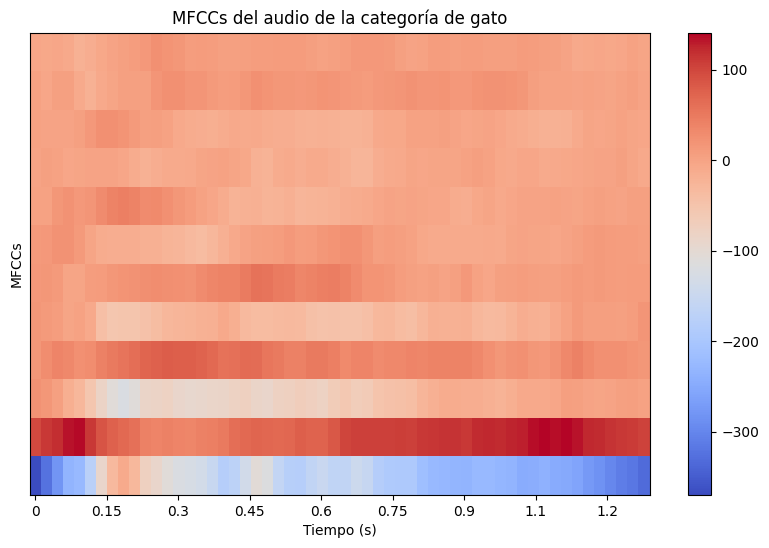

In [15]:
# Este tipo de característica es muy utilizada para tareas de reconomiento de voz o de clasificación de sonidos. Se puede extraer directamente de librosa
# MFCC de la categoría de gatos
mfcc_cat = librosa.feature.mfcc(y=cat, sr=sr, n_mfcc=12)
# Visualización de los MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_cat, x_axis='time')
plt.colorbar()
plt.title('MFCCs del audio de la categoría de gato')
plt.xlabel('Tiempo (s)')
plt.ylabel('MFCCs')
plt.show()

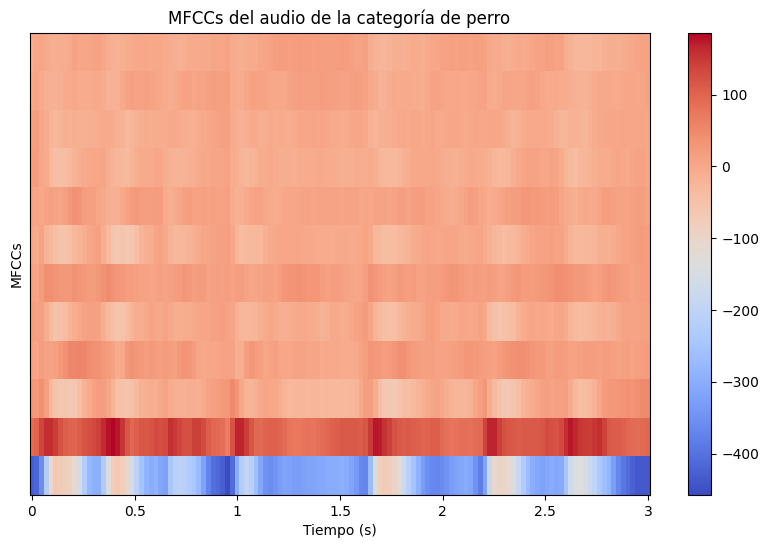

In [16]:
# Este tipo de característica es muy utilizada para tareas de reconomiento de voz o de clasificación de sonidos. Se puede extraer directamente de librosa
# MFCC de la categoría de perros
mfcc_dog = librosa.feature.mfcc(y=dog, sr=sr, n_mfcc=12)
# Visualización de los MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_dog, x_axis='time')
plt.colorbar()
plt.title('MFCCs del audio de la categoría de perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('MFCCs')
plt.show()

El gráfico es una representación de los Coeficientes Cepstrales en la Frecuencia de Mel (MFCCs) del audio de la categoría de "gato" y "perro". Los colores de magnitud representan:

* Rojo intenso: Valores más altos de los coeficientes MFCCs, indicando mayor energía en esas frecuencias.
* Azul intenso: Valores más bajos, lo que sugiere frecuencias menos energéticas.


**Cambio de tono (Pitch shifting)**

Se puede cambiar el audio sin alterar la velocidad, lo que resulta útil para manipular la tonalidad sin afectar el ritmo.

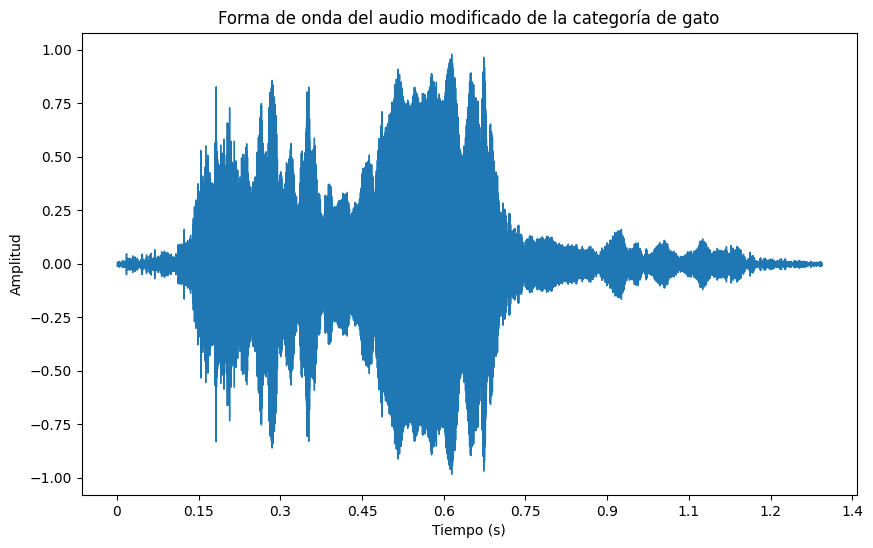

Audio con cambio de tono


In [17]:
audio_pitch_shifted_cat = librosa.effects.pitch_shift(cat, sr=sr, n_steps=2)
Audio(audio_pitch_shifted_cat, rate=sr)
# Visualizar la forma de la onda del audio modificado
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_pitch_shifted_cat, sr=sr)
plt.title('Forma de onda del audio modificado de la categoría de gato')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()
# Reproducción del audio con cambio del tono
print("Audio con cambio de tono")
Audio(audio_pitch_shifted_cat, rate=sr)

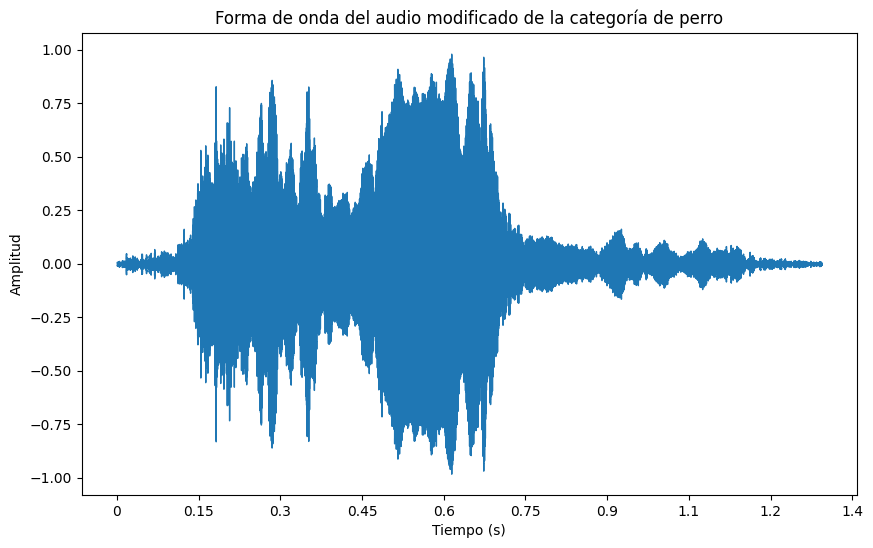

Audio con cambio de tono


In [18]:
audio_pitch_shifted_dog = librosa.effects.pitch_shift(dog, sr=sr, n_steps=2)
Audio(audio_pitch_shifted_dog, rate=sr)
# Visualizar la forma de la onda del audio modificado
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_pitch_shifted_cat, sr=sr)
plt.title('Forma de onda del audio modificado de la categoría de perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()
# Reproducción del audio con cambio del tono
print("Audio con cambio de tono")
Audio(audio_pitch_shifted_dog, rate=sr)

**Eliminar el silencio (Voice Activity Detection)**

Se puede eliminar el silencio de ciertas partes del audio, es útil para eliminar ruidos o partes no deseadas del audio.

In [19]:
dog2, sr = librosa.load('/content/drive/MyDrive/CDSI/Notebooks/cats_dogs/train/dog/dog_barking_96.wav')

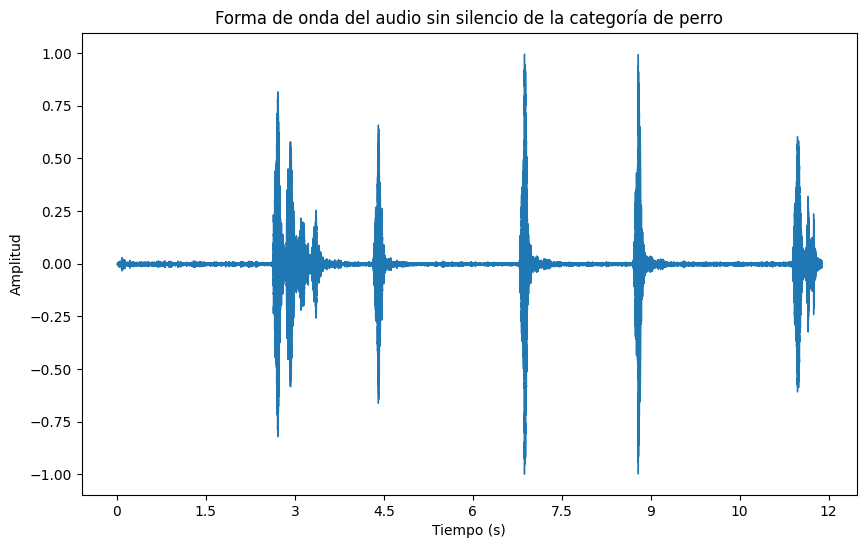

Audio sin silencio


In [20]:
# Eliminar el silencio del audio
audio_sin_silencio, _ = librosa.effects.trim(dog2)
# Visualización
plt.figure(figsize=(10, 6))
librosa.display.waveshow(audio_sin_silencio, sr=sr)
plt.title('Forma de onda del audio sin silencio de la categoría de perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()
# Reproducción del audio sin silencio
print("Audio sin silencio")
Audio(audio_sin_silencio, rate=sr)

**Cambiar la velocidad del audio**

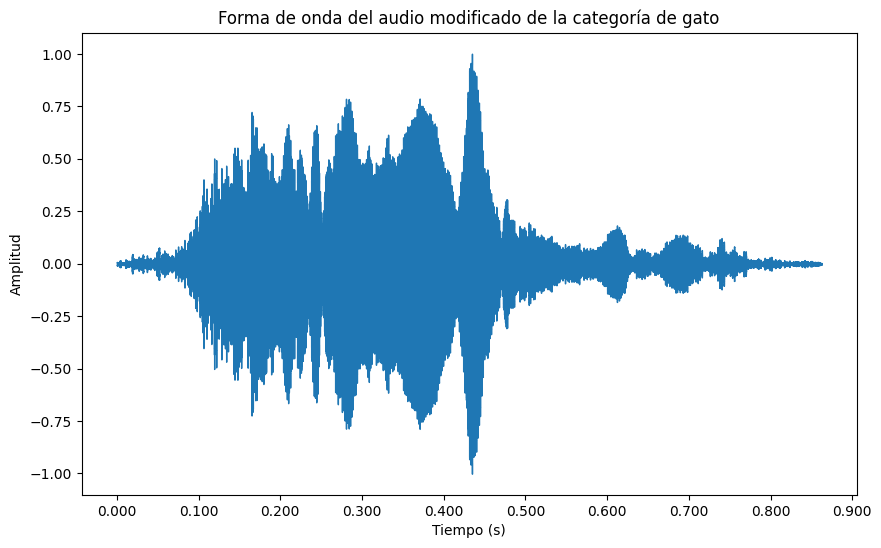

Audio con cambio de velocidad


In [21]:
speed_audio_cat = librosa.effects.time_stretch(cat, rate=1.5)
Audio(speed_audio_cat, rate=sr)
# Visualización
plt.figure(figsize=(10, 6))
librosa.display.waveshow(speed_audio_cat, sr=sr)
plt.title('Forma de onda del audio modificado de la categoría de gato')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()
# Reproducción del audio con cambio de velocidad
print("Audio con cambio de velocidad")
Audio(speed_audio_cat, rate=sr)

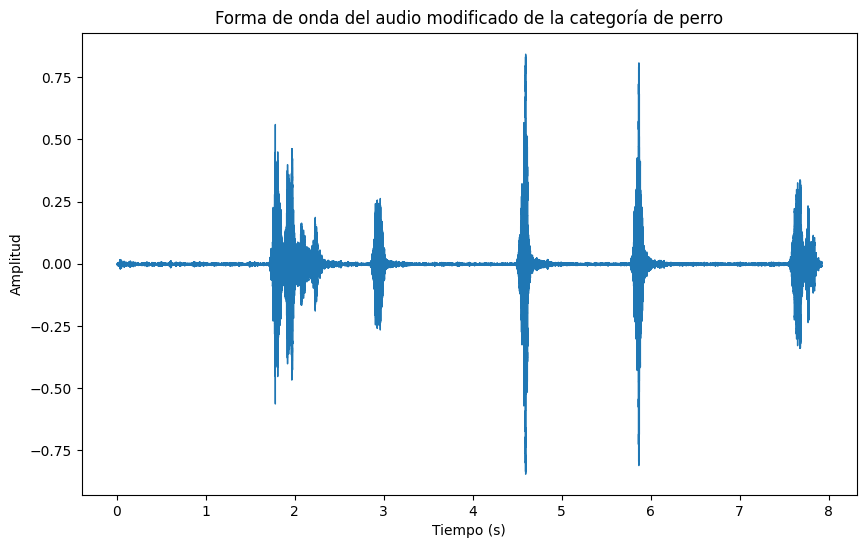

Audio con cambio de velocidad


In [22]:
speed_audio = librosa.effects.time_stretch(dog2, rate=1.5)
Audio(speed_audio, rate=sr)
# Visualización
plt.figure(figsize=(10, 6))
librosa.display.waveshow(speed_audio, sr=sr)
plt.title('Forma de onda del audio modificado de la categoría de perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()
# Reproducción del audio con cambio de velocidad
print("Audio con cambio de velocidad")
Audio(speed_audio, rate=sr)

**Audio con ruido**

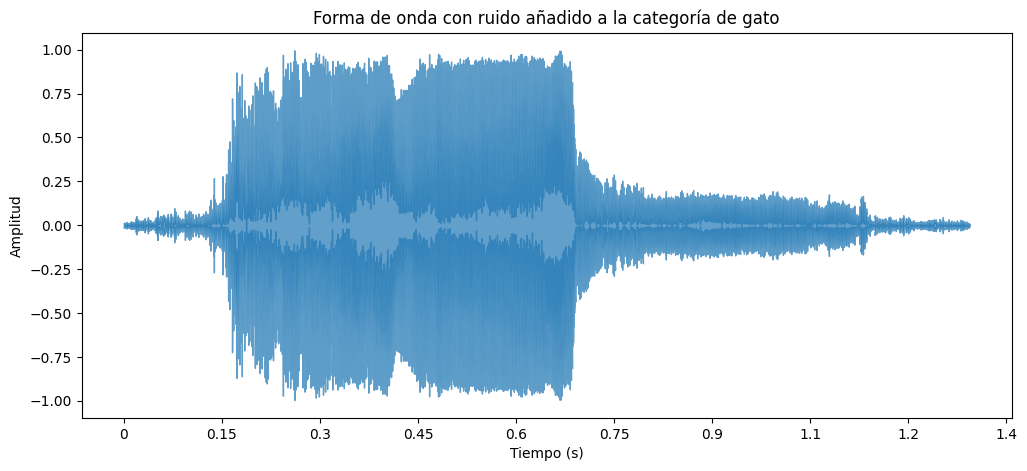

In [23]:
def noise(audio, noise_level=0.005):
    return audio + noise_level * np.random.randn(len(audio))

# Aplicar ruido al audio
x = noise(cat)

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr, alpha=0.7)
plt.title('Forma de onda con ruido añadido a la categoría de gato')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Reproducción del audio con ruido
Audio(x, rate=sr)

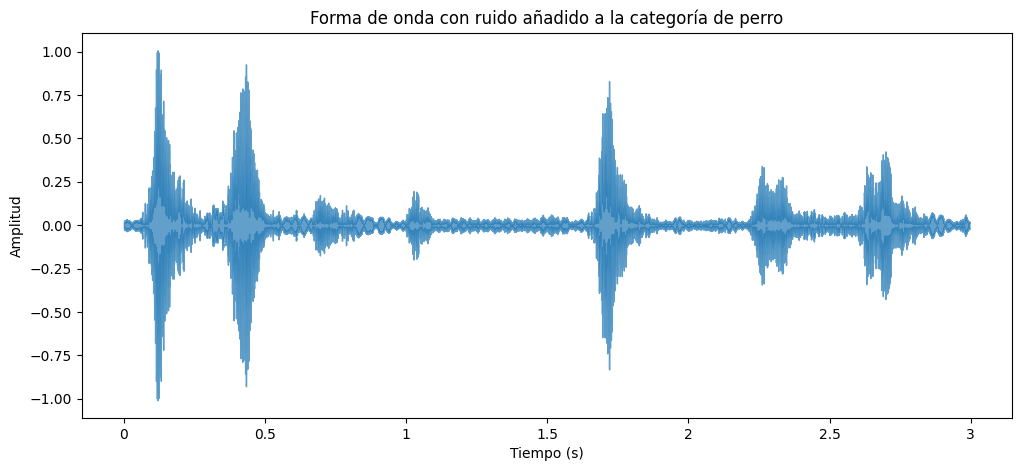

In [24]:
def noise(audio, noise_level=0.005):
    return audio + noise_level * np.random.randn(len(audio))

# Aplicar ruido al audio
x = noise(dog)

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr, alpha=0.7)
plt.title('Forma de onda con ruido añadido a la categoría de perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Reproducción del audio con ruido
Audio(x, rate=sr)

**Aplicar stretch a los audios**

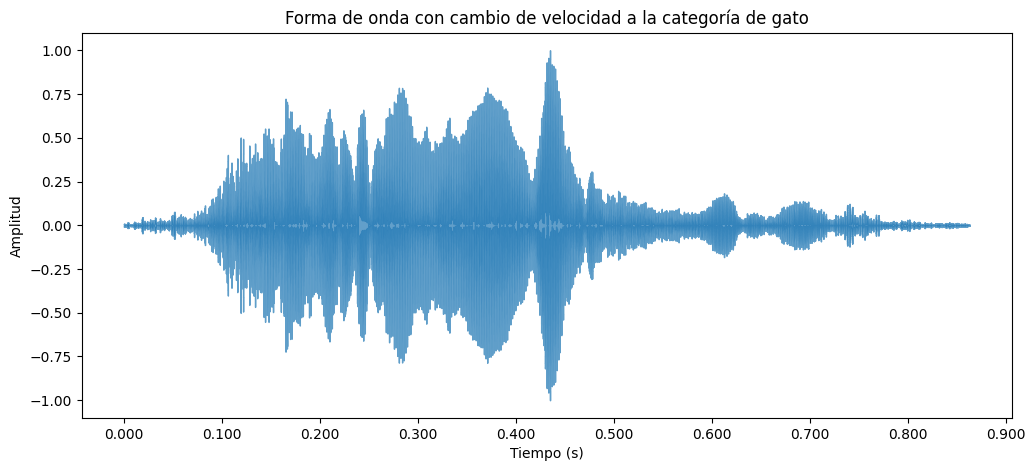

In [25]:
def stretch(data, rate=1.5):
    return librosa.effects.time_stretch(data, rate=rate)
x = stretch(cat)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr, alpha=0.7)
plt.title('Forma de onda con cambio de velocidad a la categoría de gato')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
Audio(x, rate=sr)

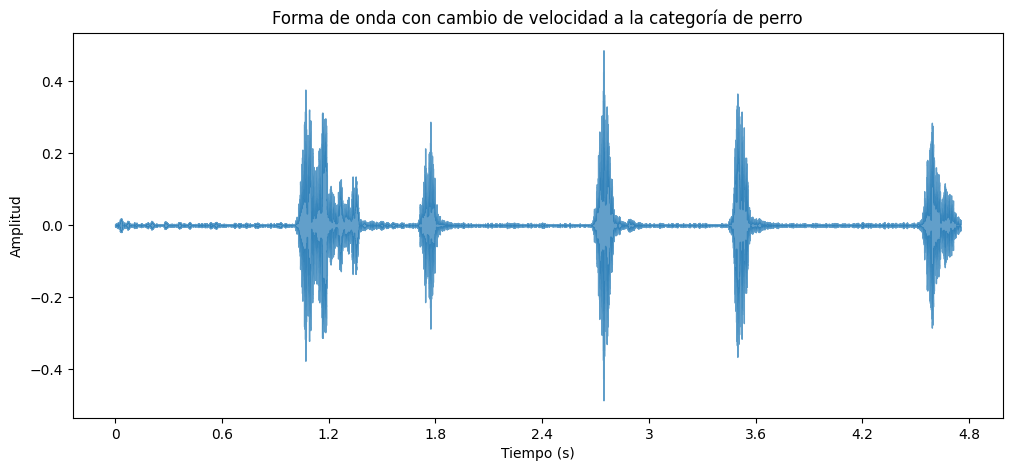

In [26]:
def stretch(data, rate=2.5):
    return librosa.effects.time_stretch(data, rate=rate)
x = stretch(dog2)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr, alpha=0.7)
plt.title('Forma de onda con cambio de velocidad a la categoría de perro')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
Audio(x, rate=sr)